In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Optional: Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')  # or use full path if necessary
print("Shape:", df.shape)
df.head()

Shape: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 1. Dataset info
df.info()

# 2. Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 3. Check for zero values in non-logical places
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("\nZero Values in Important Features:")
for col in cols_with_zeros:
    print(f"{col}: {(df[col] == 0).sum()}")

# 4. Basic statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age         

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Replace 0s with median (for features where 0 isn't valid)
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
    median_val = df[col].median()
    df[col] = df[col].replace(0, median_val)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Features and Labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🔍 Logistic Regression
Accuracy: 0.7662
ROC AUC: 0.8197
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154


🔍 KNN
Accuracy: 0.7532
ROC AUC: 0.7900
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154


🔍 SVM
Accuracy: 0.7532
ROC AUC: 0.8079
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      

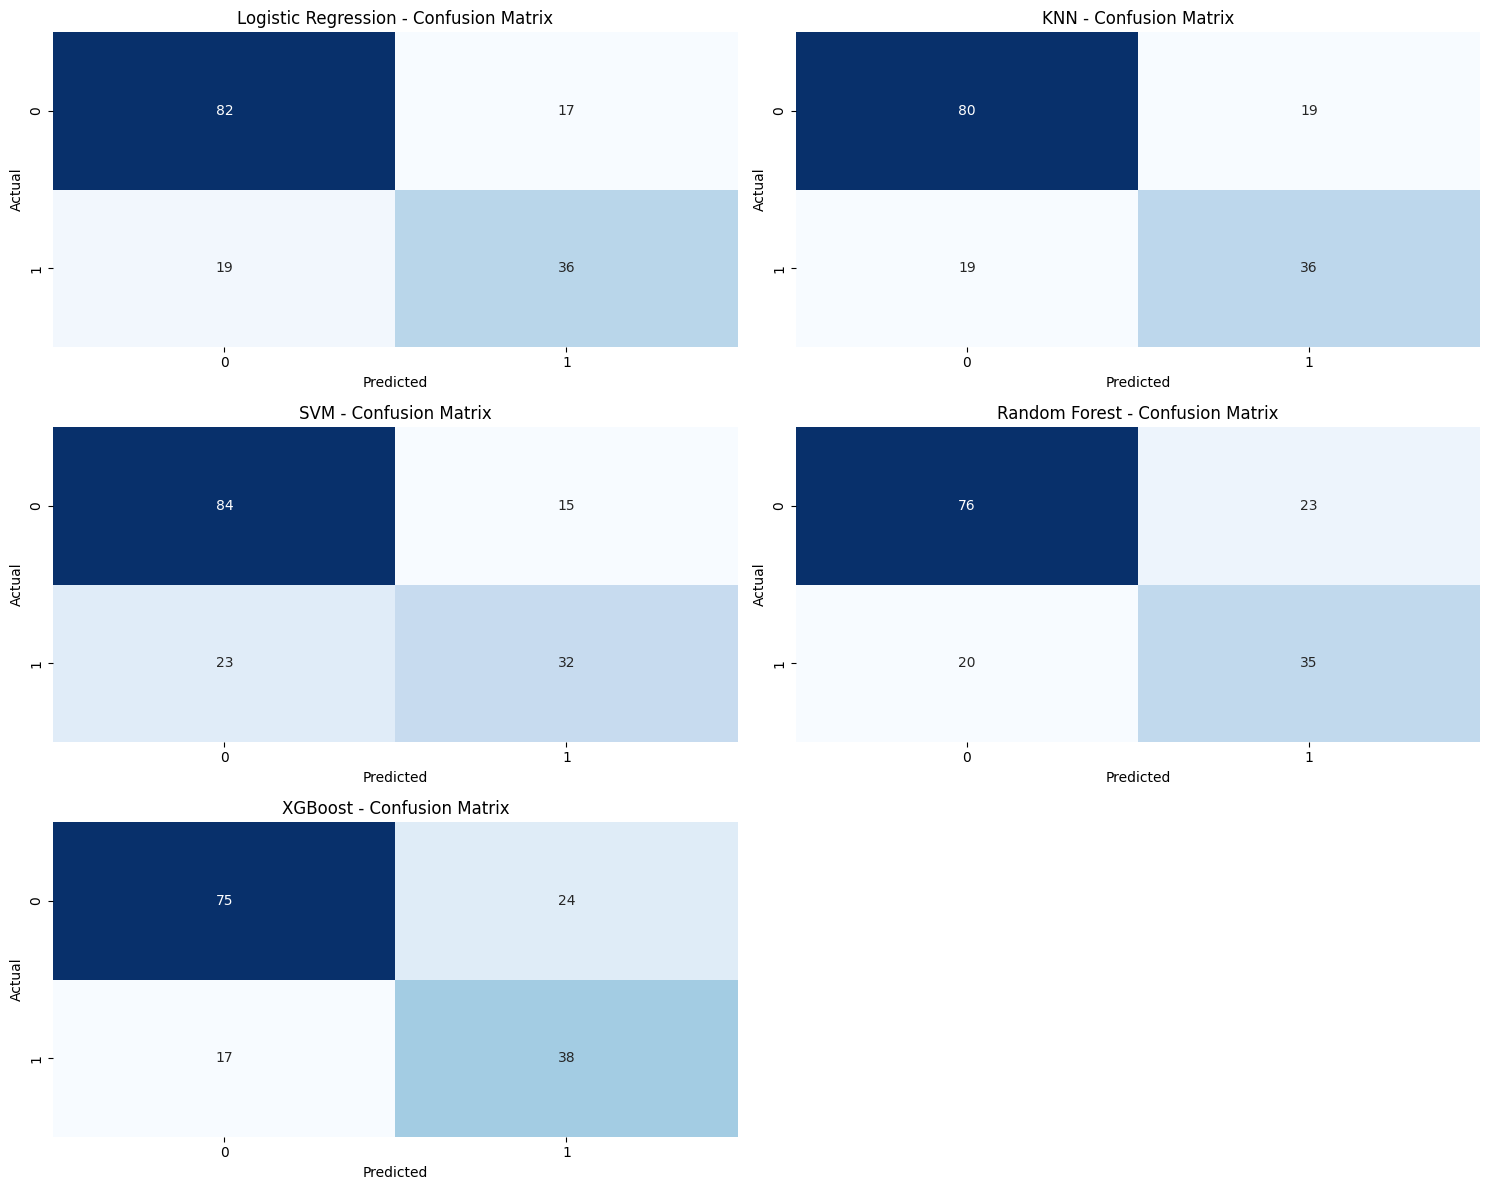

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Set up plot
plt.figure(figsize=(15, 12))
plot_index = 1

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1])
    
    print(f"\n🔍 {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting confusion matrix
    plt.subplot(3, 2, plot_index)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plot_index += 1

plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

# Grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)

# Evaluate on test set
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_lr))


Best Logistic Regression Params: {'C': 0.1, 'solver': 'liblinear'}
Best CV Score: 0.767146474743436
Test Accuracy: 0.7597402597402597


In [10]:
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring='accuracy'
)

grid_xgb.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best CV Score:", grid_xgb.best_score_)

# Evaluate on test set
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred_xgb))


Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best CV Score: 0.7768625882980142
Test Accuracy: 0.7467532467532467


In [11]:
import joblib

# Save the best Logistic Regression model
joblib.dump(best_lr, 'diabetes_logreg_model.pkl')

# Save the StandardScaler used for preprocessing
joblib.dump(scaler, 'scaler.pkl')

print("✅ Model and scaler saved successfully.")

✅ Model and scaler saved successfully.
